<a href="https://colab.research.google.com/github/karolinaprygiel/ai-project/blob/main/satisfaction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Wczytywanie danych

Dataset został już wcześniej podzielony na train i test, gdzie train zawiera 80% wszystkich danych, a test 20%.

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/karolinaprygiel/ai-project/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/karolinaprygiel/ai-project/main/test.csv')

## Rzućmy okiem na wczytane dane

In [ ]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## Opisy poszczególnych kolumn

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Data set zawiera 25 kolumn i 103903 rekordy.
Dataset zawiera zarówno dane dyskretne, ciągłe jak i tekstowe.

## Zmiana nazw kolumn

Nazwy niektórych kolumn zawierają spacje. Łatwiej będzie te kolumny przetwarzać, jeśli te spacje zastąpimy "_".

In [ ]:
train.columns = train.columns.str.replace(' ','_')
test.columns = test.columns.str.replace(' ','_')

In [ ]:
train.columns

Index(['Unnamed:_0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

# Wizualizacja danych

## Dane kategoryczne

Text(0.5, 1.0, 'Rodzaj podróży')

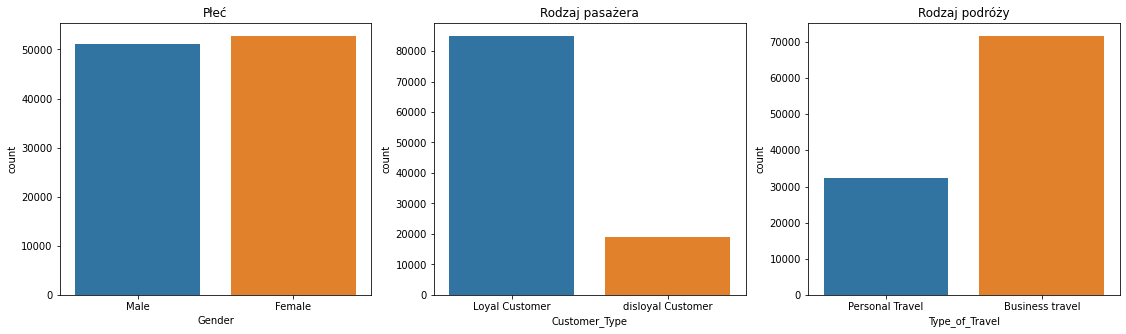

In [ ]:
fig,axes = plt.subplots(1,3,figsize = (19,5))
sns.countplot(ax=axes[0],x='Gender', data=train).set_title("Płeć")
sns.countplot(ax=axes[1],x='Customer_Type', data=train).set_title("Rodzaj pasażera")
sns.countplot(ax=axes[2],x='Type_of_Travel', data=train).set_title("Rodzaj podróży")


### Oceny poszczególnych czynników (w skali 1-5; 0 - brak danych)

Text(0.5, 1.0, 'Czystość')

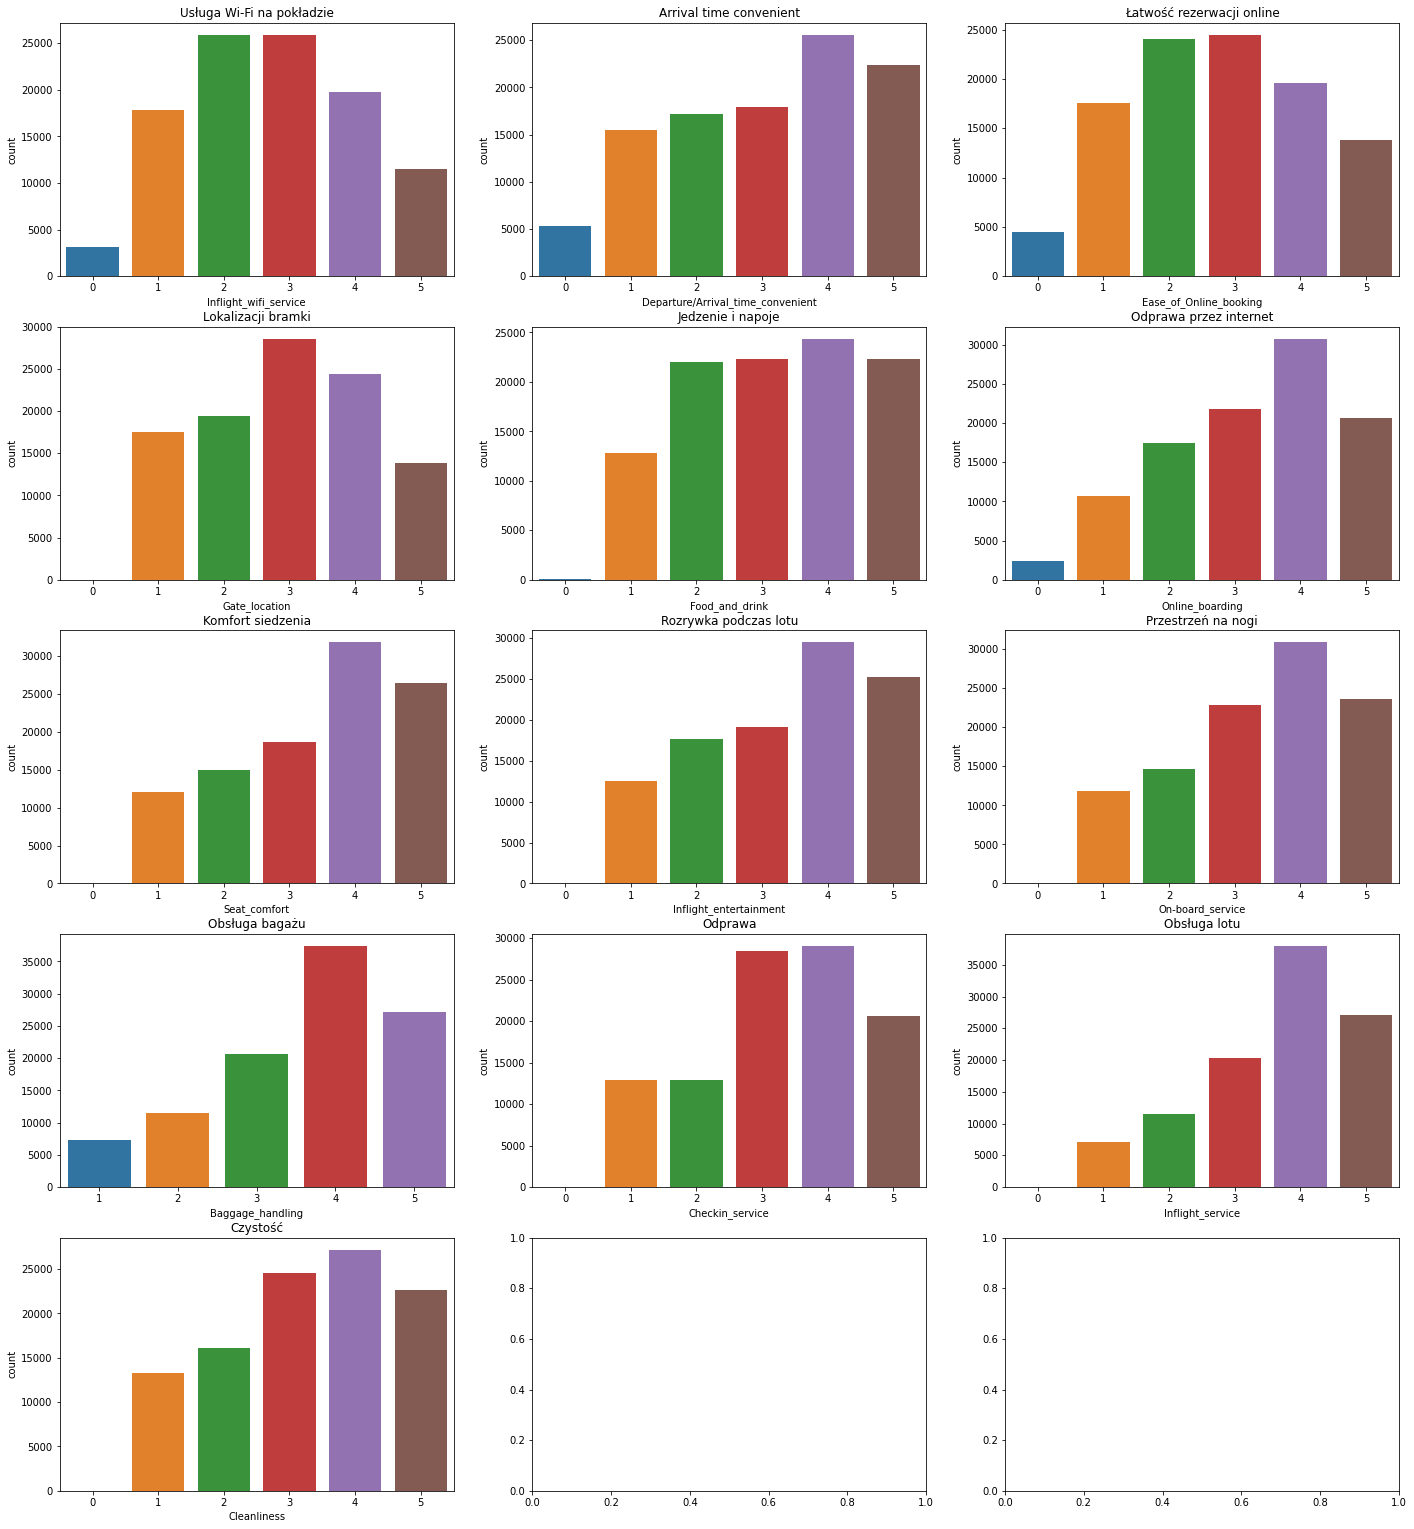

In [ ]:
fig,axes = plt.subplots(5,3,figsize = (24,27))
sns.countplot(ax=axes[0,0],x='Inflight_wifi_service', data=train).set_title("Usługa Wi-Fi na pokładzie")
sns.countplot(ax=axes[0,1],x='Departure/Arrival_time_convenient', data=train).set_title("Arrival time convenient")
sns.countplot(ax=axes[0,2],x='Ease_of_Online_booking', data=train).set_title("Łatwość rezerwacji online")
sns.countplot(ax=axes[1,0],x='Gate_location', data=train).set_title("Lokalizacji bramki")
sns.countplot(ax=axes[1,1],x='Food_and_drink', data=train).set_title("Jedzenie i napoje")
sns.countplot(ax=axes[1,2],x='Online_boarding', data=train).set_title("Odprawa przez internet")
sns.countplot(ax=axes[2,0],x='Seat_comfort', data=train).set_title("Komfort siedzenia")
sns.countplot(ax=axes[2,1],x='Inflight_entertainment', data=train).set_title("Rozrywka podczas lotu")
sns.countplot(ax=axes[2,2],x='On-board_service', data=train).set_title("Przestrzeń na nogi")
sns.countplot(ax=axes[3,0],x='Baggage_handling', data=train).set_title("Obsługa bagażu")
sns.countplot(ax=axes[3,1],x='Checkin_service', data=train).set_title("Odprawa")
sns.countplot(ax=axes[3,2],x='Inflight_service', data=train).set_title("Obsługa lotu")
sns.countplot(ax=axes[4,0],x='Cleanliness', data=train).set_title("Czystość")




## Dane liczbowe

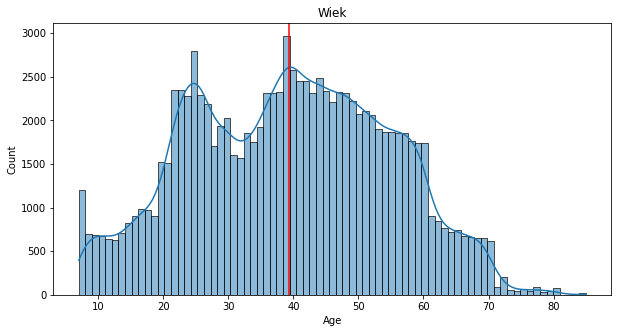

In [ ]:
fig = plt.figure(figsize = (10,5))
sns.histplot(train['Age'], kde="True", ax=fig.gca()).set_title("Wiek")
plt.axvline(train['Age'].mean(), color='red')

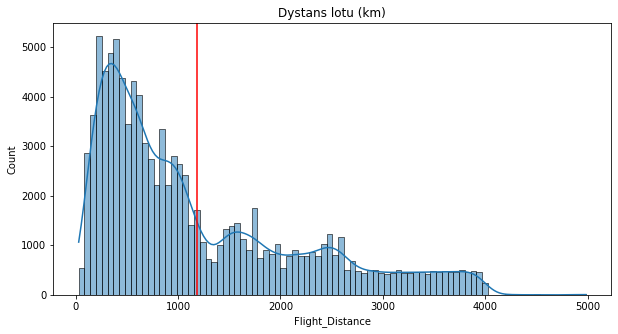

In [ ]:
fig = plt.figure(figsize = (10,5))
sns.histplot(train['Flight_Distance'], kde="True", ax=fig.gca()).set_title("Dystans lotu (km)")
plt.axvline(train['Flight_Distance'].mean(), color='red')

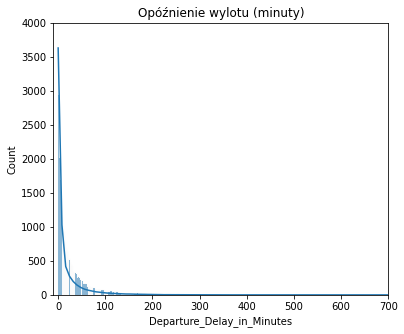

In [ ]:
fig = plt.figure(figsize = (6,5))
sns.histplot(train['Departure_Delay_in_Minutes'], kde="True", ax=fig.gca()).set_title("Opóźnienie wylotu (minuty)")
plt.xlim(-10, 700)
plt.ylim(0, 4000)
plt.show()

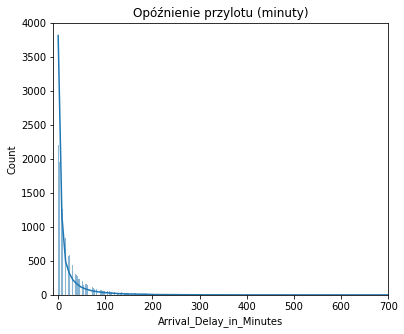

In [ ]:
fig = plt.figure(figsize = (6,5))
sns.histplot(train['Arrival_Delay_in_Minutes'], kde="True", ax=fig.gca()).set_title("Opóźnienie przylotu (minuty)")
plt.xlim(-10, 700)
plt.ylim(0, 4000)
plt.show()

### Etykiety - zbalansowanie danych

Text(0.5, 1.0, 'Zadowolenie z lotu')

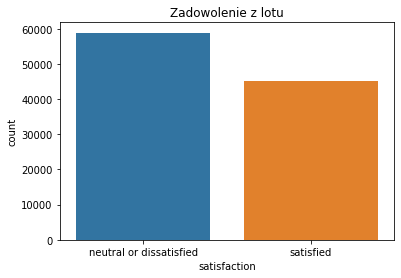

In [ ]:
sns.countplot(x='satisfaction', data=train).set_title("Zadowolenie z lotu")

In [ ]:
train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Dane są całkiem dobrze zbalansowane.

##Dane kategoryczne vs Zadowolenie z lotu

Text(0.5, 1.0, 'Rodzaj podróży')

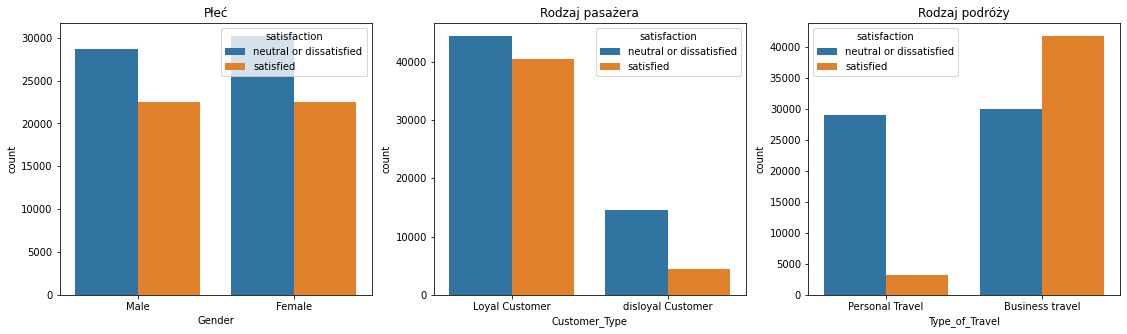

In [ ]:
fig,axes = plt.subplots(1,3,figsize = (19,5))
sns.countplot(ax=axes[0],x='Gender', hue="satisfaction", data=train).set_title("Płeć")
sns.countplot(ax=axes[1],x='Customer_Type',hue="satisfaction", data=train).set_title("Rodzaj pasażera")
sns.countplot(ax=axes[2],x='Type_of_Travel',hue="satisfaction", data=train).set_title("Rodzaj podróży")

Text(0.5, 1.0, 'Czystość')

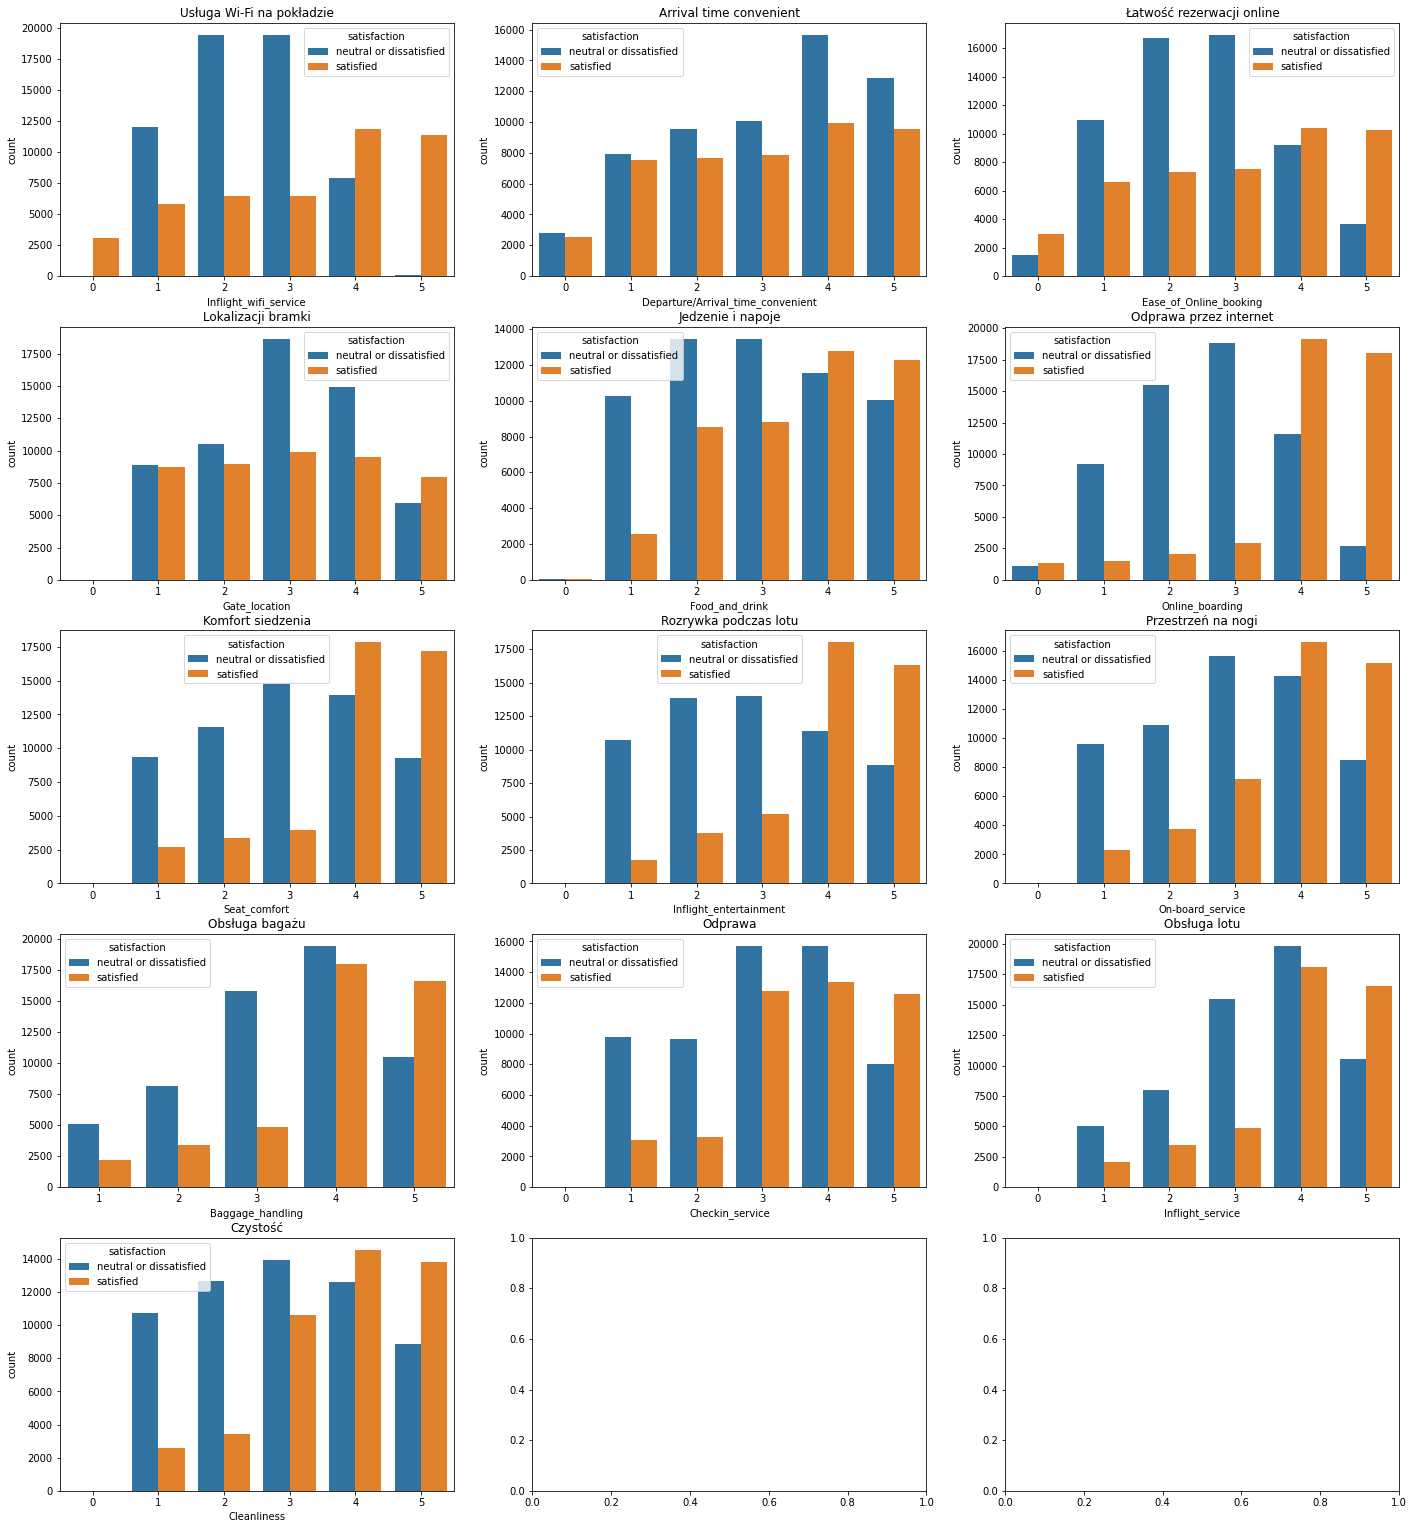

In [ ]:
fig,axes = plt.subplots(5,3,figsize = (24,27))
sns.countplot(ax=axes[0,0],x='Inflight_wifi_service', hue="satisfaction", data=train).set_title("Usługa Wi-Fi na pokładzie")
sns.countplot(ax=axes[0,1],x='Departure/Arrival_time_convenient', hue="satisfaction", data=train).set_title("Dogodny czas przyjazdu")
sns.countplot(ax=axes[0,2],x='Ease_of_Online_booking', hue="satisfaction", data=train).set_title("Łatwość rezerwacji online")
sns.countplot(ax=axes[1,0],x='Gate_location', hue="satisfaction", data=train).set_title("Lokalizacji bramki")
sns.countplot(ax=axes[1,1],x='Food_and_drink', hue="satisfaction", data=train).set_title("Jedzenie i napoje")
sns.countplot(ax=axes[1,2],x='Online_boarding', hue="satisfaction", data=train).set_title("Odprawa przez internet")
sns.countplot(ax=axes[2,0],x='Seat_comfort', hue="satisfaction", data=train).set_title("Komfort siedzenia")
sns.countplot(ax=axes[2,1],x='Inflight_entertainment', hue="satisfaction", data=train).set_title("Rozrywka podczas lotu")
sns.countplot(ax=axes[2,2],x='On-board_service', hue="satisfaction", data=train).set_title("Przestrzeń na nogi")
sns.countplot(ax=axes[3,0],x='Baggage_handling', hue="satisfaction", data=train).set_title("Obsługa bagażu")
sns.countplot(ax=axes[3,1],x='Checkin_service', hue="satisfaction", data=train).set_title("Odprawa")
sns.countplot(ax=axes[3,2],x='Inflight_service', hue="satisfaction", data=train).set_title("Obsługa lotu")
sns.countplot(ax=axes[4,0],x='Cleanliness', hue="satisfaction", data=train).set_title("Czystość")


## Dane liczbowe vs Zadowolenie z lotu

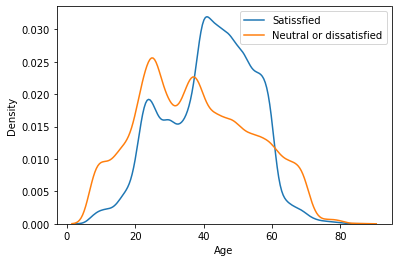

In [ ]:
sns.kdeplot(x=train.loc[train['satisfaction']=="satisfied"]['Age'],label='Satissfied')
sns.kdeplot(x=train.loc[train['satisfaction']=="neutral or dissatisfied"]['Age'],label='Neutral or dissatisfied')
plt.legend()
plt.show()

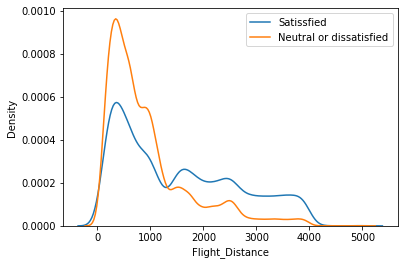

In [ ]:
sns.kdeplot(x=train.loc[train['satisfaction']=="satisfied"]['Flight_Distance'],label='Satissfied')
sns.kdeplot(x=train.loc[train['satisfaction']=="neutral or dissatisfied"]['Flight_Distance'],label='Neutral or dissatisfied')
plt.legend()
plt.show()

In [ ]:
# plt.figure(figsize = (36,5))
# plt.xlim(0, 400)
# sns.kdeplot(x=train.loc[train['satisfaction']=="satisfied"]['Departure_Delay_in_Minutes'],label='Satissfied')
# sns.kdeplot(x=train.loc[train['satisfaction']=="neutral or dissatisfied"]['Departure_Delay_in_Minutes'],label='Neutral or dissatisfied')
# plt.legend()
# plt.show()

### Pierwszy rzut okna na korelację

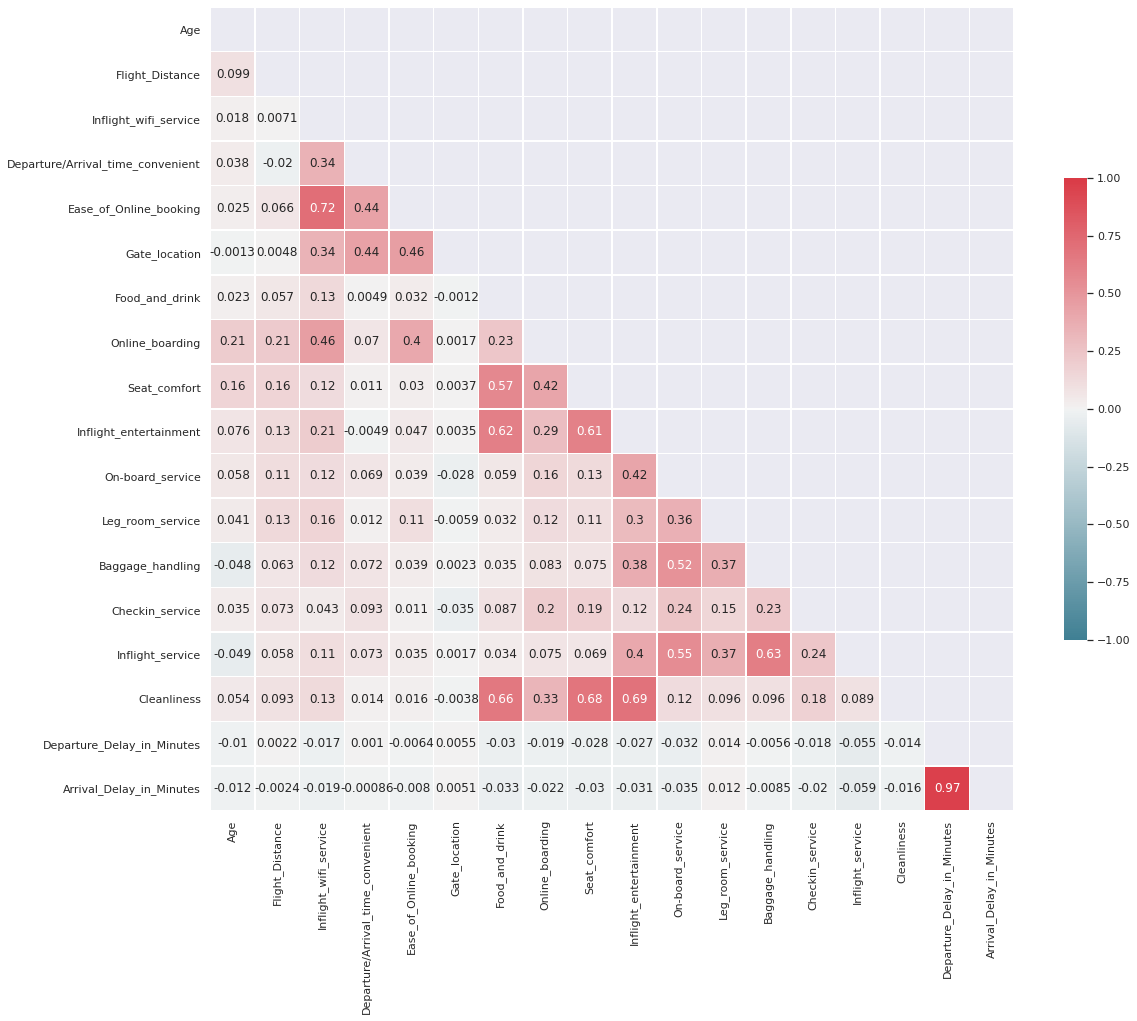

In [ ]:
sns.set(style="darkgrid")

corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(18, 17))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [ ]:
train.describe()

,Unnamed:_0,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Przetwarzanie danych

Spójrzmy jeszcze raz na dane w poszczególnych kolumnach

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed:_0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online_booking             103904 non-null  int64  
 11  Gate_location                      1039

In [ ]:
print(train["Unnamed:_0"].nunique())
print(train["id"].nunique())

103904
103904


**Kolumny Unnamed:_0 i id są unikalne dla każdego wiersza, więc możemy je usunąć.**

In [ ]:
train.drop(columns=['id', "Unnamed:_0" ],inplace=True) 

In [ ]:
test.drop(columns=['id', "Unnamed:_0" ],inplace=True) 

In [ ]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


##Problem missing data

In [ ]:
train.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

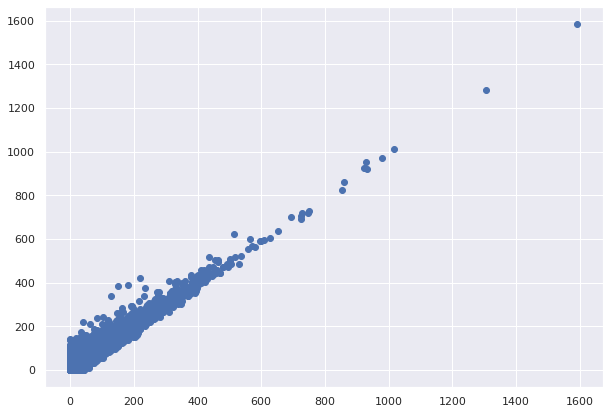

In [ ]:
fig = plt.figure(figsize = (10,7))
plt.scatter(train['Departure_Delay_in_Minutes'], train['Arrival_Delay_in_Minutes'])

Brakuje 310 wartości w kolumnie Arrival_Delay_in_Minutes. Z wykresu korelacji widzimy, że kolumna ta jest bardzo mocno (0.97) skorelowana z kolumną Departure_Delay_in_Minutes, więc możemy spróbować zamienić brakujące wartości w Arrival_Delay_in_Minutes możemy wypelnić wartościami z Departure_Delay_in_Minutes.

In [ ]:
train['Arrival_Delay_in_Minutes'].fillna(train['Departure_Delay_in_Minutes'], inplace = True)
test['Arrival_Delay_in_Minutes'].fillna(test['Departure_Delay_in_Minutes'], inplace = True)

In [ ]:
train.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

Należy się przyjrzeć również kolumnom zawierającym oceny różnych czynników w skali 1-5. Niektóre z nich zawierają również 0, co według opisu oznacza brak danych / nie dotyczy.

In [ ]:
train[train['Inflight_wifi_service'] == 0].shape[0]

3103

In [ ]:
columns = ['Inflight_wifi_service','Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 
           'Gate_location','Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 
           'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']

In [ ]:


for column in columns:
  print(column + ": " + str(train[train[column] == 0].shape[0]) )


Inflight_wifi_service: 3103
Departure/Arrival_time_convenient: 5300
Ease_of_Online_booking: 4487
Gate_location: 1
Food_and_drink: 107
Online_boarding: 2428
Seat_comfort: 1
Inflight_entertainment: 14
On-board_service: 3
Baggage_handling: 0
Checkin_service: 1
Inflight_service: 3
Cleanliness: 12


Możemy usunąć dane, które posiadają mniej niż 150 brakujących wartości.

In [ ]:
for column in columns:
  if (train[train[column] == 0].shape[0] < 150) or  (test[test[column] == 0].shape[0] < 150):
    train = train[train[column] != 0]

Spójrzmy na pozostałe kolumny

In [ ]:
for column in columns:
  if train[train[column] == 0].shape[0] > 0:
    print(column + ": " + str(train[train[column] == 0].shape[0]) )

Inflight_wifi_service: 3048
Departure/Arrival_time_convenient: 5266
Ease_of_Online_booking: 4393
Online_boarding: 2428


##LabelEncoder

In [ ]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in ['Gender', 'Customer_Type', 'Type_of_Travel', 'satisfaction' ]:
  train[column] = label_encoder.fit_transform(train[column])
  test[column] = label_encoder.fit_transform(test[column])


In [ ]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Business,Eco,Eco Plus
0,1,0,13,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,0,0
2,0,0,26,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,0
3,0,0,25,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,0
4,1,0,61,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1,0,0


##One-hot encoding

In [ ]:
train["Class"].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [ ]:
train[f'{cat[i]}'] = pd.Categorical(data[f'{cat[i]}'])
dummies = pd.get_dummies(data[f'{cat[i]}'], prefix = f'{cat[i]}_encoded')
data.drop([f'{cat[i]}'], axis=1, inplace=True)
data = pd.concat([data, dummies], axis=1)
    
data.head()

In [ ]:
one_hot = pd.get_dummies(train['Class'])
train = train.drop('Class',axis = 1)
train = train.join(one_hot)


In [ ]:
one_hot = pd.get_dummies(test['Class'])
test = test.drop('Class',axis = 1)
test = test.join(one_hot)

In [ ]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Business,Eco,Eco Plus
0,Male,0,13,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,0,1
1,Male,1,25,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,0,0
2,Female,0,26,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,0
3,Female,0,25,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,0
4,Male,0,61,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1,0,0


## Spójrzmy ponownie na korelację

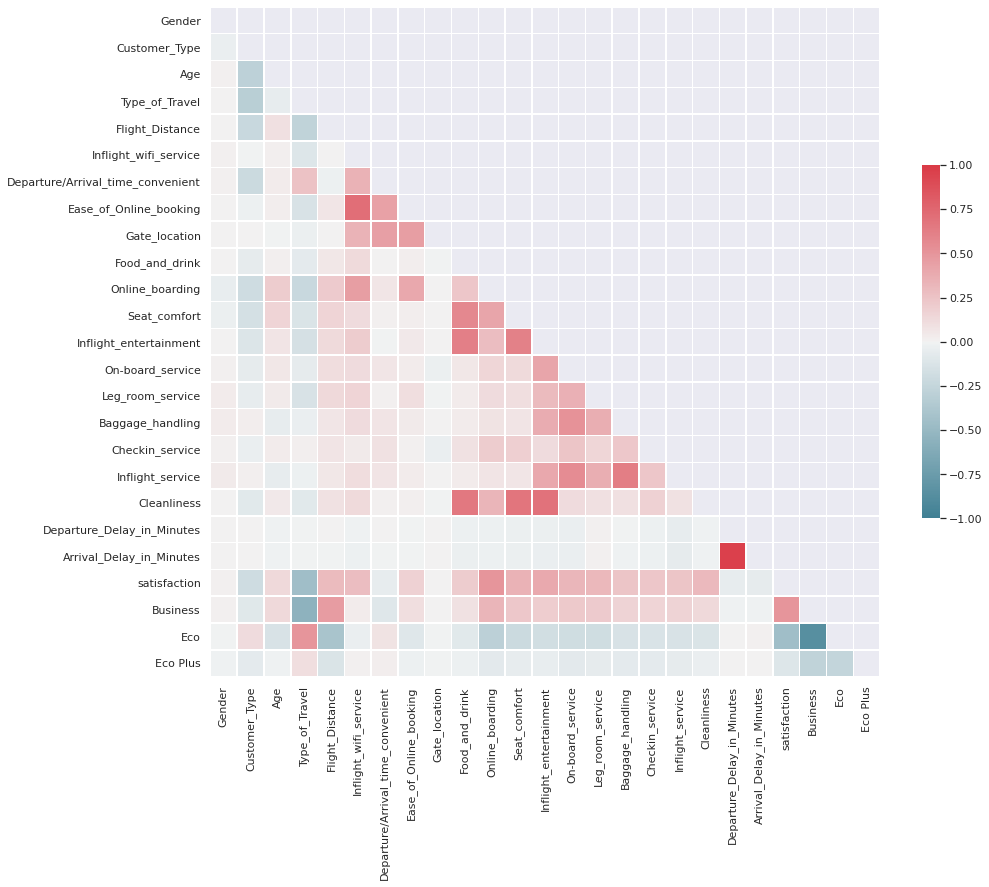

In [ ]:
sns.set(style="darkgrid")

corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

#Modelowanie danych

In [ ]:
X_train = train.loc[:, train.columns != "satisfaction"]
y_train = train["satisfaction"]

X_test = test.loc[:, test.columns != "satisfaction"]
y_test = test["satisfaction"]

##Modele
* Regresja Logistyczna
* Random Forests
* SVM

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


##Regresja Logistyczna

In [ ]:
pipe_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(C=1, solver='newton-cg'))])


param_grid = {
            'scaler': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10]
}

grid_1 = GridSearchCV(pipe_1, param_grid, cv=kfold)

In [ ]:
grid_1.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        LogisticRegression(C=1,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
               

In [ ]:
grid_1.best_params_

{'classifier__C': 1, 'scaler': None}

In [ ]:
model_1_preds = grid_1.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_1_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_1_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_1_preds)))

precision: 0.8697602050155592
f1: 0.8511800797169601
accuracy: 0.8720742223591007


##Random Forests

In [ ]:
pipe_2 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_2 = {
              'scaler': [StandardScaler(), None],
              'classifier__n_estimators': [5,10, 50, 100],
              'classifier__max_leaf_nodes': [2, 5, 10, 20, 50],
              'classifier__max_depth': [10, 20]
             }

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True, n_jobs=-1)

In [ ]:
grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 50,
 'classifier__n_estimators': 50,
 'scaler': None}

In [ ]:
model_2_preds = grid_2.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_2_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_2_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_2_preds)))

precision: 0.9363503915498088
f1: 0.918740227831137
accuracy: 0.9299738219895288


## SVM - linear

In [184]:
pipe_3 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', SVC(kernel="linear"))
                  ])

param_grid_3 = {
              'scaler': [StandardScaler(), None],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
             }

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True, n_jobs=-1)

In [185]:
grid_3.fit(X_train, y_train)
grid_3.best_params_

KeyboardInterrupt: ignored

In [ ]:
model_3_preds = grid_3.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_3_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_3_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_3_preds)))

In [ ]:
pipeline_3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear", probability=True))])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_


from sklearn.svm import SVC